# Demo 19

In [1]:
import pandas as pd
import sklearn
import numpy as np

import matplotlib.pyplot as plt

## Dataset - Obits from HW02

Now lets look at using kmeans to cluster documents

Load in data. This takes a little while.

In [2]:
df = pd.read_csv("data/tfidf_hw02.csv.gz", compression="gzip")
df.shape

(364, 35049)

In [3]:
df.index

RangeIndex(start=0, stop=364, step=1)

In [4]:
df.head(5)

,subject,aachen,aahs,aarau,aaron,aaugh,ab,ababa,aback,abaco,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
0,Randolph,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Basie,0.0,0.0,0.0,0.012317,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Swope,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ulanova,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sousa,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.index = df['subject']
df

,subject,aachen,aahs,aarau,aaron,aaugh,ab,ababa,aback,abaco,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
subject,,,,,,,,,,,,,,,,,,,,,
Randolph,Randolph,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basie,Basie,0.0,0.0,0.0,0.012317,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Swope,Swope,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulanova,Ulanova,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sousa,Sousa,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Miss Balch,Miss Balch,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cage,Cage,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grant,Grant,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003402,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df = df.drop(columns=['subject'])
df

,aachen,aahs,aarau,aaron,aaugh,ab,ababa,aback,abaco,abandon,...,zrathustra,zuber,zuker,zukor,zukors,zula,zululand,zurich,zvai,zwilich
subject,,,,,,,,,,,,,,,,,,,,,
Randolph,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Basie,0.0,0.0,0.0,0.012317,0.0,0.0,0.0,0.000000,0.0,0.010460,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Swope,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ulanova,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sousa,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Miss Balch,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Cage,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.011006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grant,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.003402,0.0,0.007226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's store the dataframe in a new numpy array called X

In [7]:
X = df.to_numpy()
X.shape

(364, 35048)

In [8]:
X[-1], df.index[-1]

(array([0., 0., 0., ..., 0., 0., 0.]), 'Tandy')

### Sparsity

In [9]:
values, counts = np.unique(X, return_counts=True)
counts, values

(array([12499345,        1,        1, ...,        1,        1,        1]),
 array([0.        , 0.000985  , 0.00105308, ..., 0.8868675 , 0.89451676,
        0.91090351]))

Most common value is 0

### Size

In [10]:
X.shape

(364, 35048)

In [11]:
!ls -lah data/tfidf_hw02.csv.gz

-rw-rw-r-- 1 jovyan users 2.2M Jun  2 18:39 data/tfidf_hw02.csv.gz


2 MB doesnt sound like a lot, but thats because it is compressed and vocab is only 35K.

(back to slides)
## SVD

SVD in Sklearn: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

In [12]:
from sklearn.decomposition import TruncatedSVD

In [14]:
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

**Question:** what sklearn method do you think we can use to *train* the model? Here, train means learn the decomposed matrices.

<details>
<summary>Solution</summary>
    .fit()
</details>

In [ ]:
# skip

In [ ]:
svd.fit()

In [15]:
svd.fit(X)

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

### Reduce Dimensions

**Question:** what sklearn method do you think we can use to perform dimensionality reduction on X?
<details>
<summary>Solution</summary>
    .transform()
</details>

In [ ]:
# skip

In [16]:
U = svd.transform(X)
U.shape

(364, 5)

In [17]:
U

array([[ 0.1969517 ,  0.10455802,  0.03958181,  0.06317127, -0.02210682],
       [ 0.12384257, -0.12000851,  0.41991499, -0.00898755,  0.07639225],
       [ 0.16086302,  0.02870603, -0.00168286,  0.01304767, -0.03404512],
       ...,
       [ 0.41446508,  0.1780573 ,  0.00722345,  0.02692548, -0.00871281],
       [ 0.19368587,  0.00764103, -0.05233531, -0.13298163,  0.043007  ],
       [ 0.26206756, -0.26029441, -0.09145356,  0.11280092,  0.09681598]])

#### Sparsity

In [18]:
values, counts = np.unique(U, return_counts=True)
counts, values

(array([1, 1, 1, ..., 1, 1, 1]),
 array([-0.27388997, -0.26029441, -0.25167082, ...,  0.43057317,
         0.45442427,  0.48370346]))

No more 0's

#### Size

In [19]:
U.shape

(364, 5)

In [20]:
pd.DataFrame(U).to_csv("data/reduced_tfidf.csv")

In [21]:
!ls -lah data/reduced_tfidf.csv

-rw-r--r-- 1 jovyan users 38K Jun  7 15:48 data/reduced_tfidf.csv


**Question:** Is this file much smaller than the compressed tf-idf version?

### Singular Values

Remember $s_{1} > s_{2} > \ldots > s_{k} $

In [22]:
S = svd.singular_values_
S

array([3.71930583, 2.03573589, 1.66287214, 1.62254288, 1.58531469])

### Components

***V***-matrix ndarray of shape (n_components, n_features)

In [23]:
V = svd.components_
V

array([[ 6.15318285e-04,  5.91545003e-04,  4.79311343e-04, ...,
         7.11510227e-03,  3.21280490e-04,  9.93716717e-05],
       [ 9.66926671e-06, -1.88532783e-03,  2.22060794e-04, ...,
        -2.72610583e-04,  8.60827639e-04, -1.14277481e-04],
       [-5.54596516e-05, -1.25676264e-03, -4.63595100e-04, ...,
        -5.82438434e-03, -1.67563896e-04,  6.76770556e-05],
       [-1.11208493e-03,  1.59171548e-03, -1.56344551e-03, ...,
        -1.84157462e-02, -1.43886696e-03, -1.29424274e-04],
       [-9.87266696e-04,  1.05815736e-03, -4.81414476e-04, ...,
        -3.48507588e-03,  2.76539249e-03, -1.56272218e-04]])

In [24]:
V.shape

(5, 35048)

In [27]:
V[0]

array([6.15318285e-04, 5.91545003e-04, 4.79311343e-04, ...,
       7.11510227e-03, 3.21280490e-04, 9.93716717e-05])

For the first component, let's figure out the features, i.e. the words, that have the highest values

In [28]:
V[0].argsort()

array([10071,  8426, 33069, ..., 27165, 34853, 20165])

In [29]:
V[0].argsort()[:5]

array([10071,  8426, 33069, 22256, 13962])

In [31]:
df.columns[[V[0].argsort()[:5]]]

Index(['electrician', 'despot', 'unsafe', 'overstuffed', 'hairdos'], dtype='object')

Now let's find the features that are most indicative of each components

In [33]:
for k, row in enumerate(V):
    print(f"Components {k}\t", df.columns[[row.argsort()[:10]]])

Components 0	 Index(['electrician', 'despot', 'unsafe', 'overstuffed', 'hairdos',
       'degradation', 'slur', 'nan', 'detonate', 'yaobang'],
      dtype='object')
Components 1	 Index(['miss', 'film', 'theater', 'broadway', 'music', 'jazz', 'films', 'band',
       'stage', 'actress'],
      dtype='object')
Components 2	 Index(['miss', 'keller', 'book', 'women', 'life', 'woman', 'published',
       'novel', 'art', 'stanton'],
      dtype='object')
Components 3	 Index(['israel', 'soviet', 'book', 'jewish', 'novel', 'published', 'minister',
       'german', 'world', 'hitler'],
      dtype='object')
Components 4	 Index(['baseball', 'rickey', 'game', 'negro', 'ruth', 'cleveland', 'warren',
       'runs', 'book', 'court'],
      dtype='object')


## Plotting documents

In [34]:
svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
U = svd.fit_transform(df)

In [35]:
new_df = pd.DataFrame(U)
new_df

,0,1
0,0.196952,0.104724
1,0.123843,-0.119607
2,0.160863,0.028794
3,0.155135,-0.094271
4,0.199017,-0.063786
...,...,...
359,0.176282,-0.044541
360,0.152369,-0.099391
361,0.414465,0.177312
362,0.193686,0.007653


In [36]:
new_df.index = df.index
new_df

,0,1
subject,,
Randolph,0.196952,0.104724
Basie,0.123843,-0.119607
Swope,0.160863,0.028794
Ulanova,0.155135,-0.094271
Sousa,0.199017,-0.063786
...,...,...
Miss Balch,0.176282,-0.044541
Cage,0.152369,-0.099391
Grant,0.414465,0.177312


<AxesSubplot:xlabel='1', ylabel='0'>

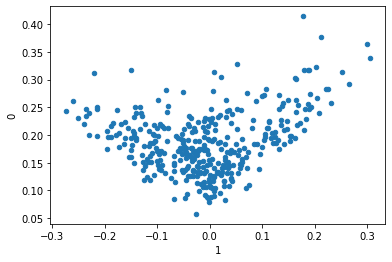

In [37]:
new_df.plot.scatter(x=1, y=0)

### Train Kmeans model

**Question:** What function do we think we can use to train the model?

<details>
<summary>Hint</summary>
    What function did we use yesterday to train the Naive Bayes and Logistic Regression classifiers
</details>

<details>
<summary>Solution</summary>
    .fit()
</details>

In [44]:
from sklearn.cluster import KMeans

kmeans_model = km = KMeans(n_clusters=2)
kmeans_model.fit(X)

KMeans(n_clusters=2)

In [45]:
kmeans_model.labels_

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [46]:
new_df['cluster'] = kmeans_model.labels_
new_df

,0,1,cluster
subject,,,
Randolph,0.196952,0.104724,0
Basie,0.123843,-0.119607,1
Swope,0.160863,0.028794,0
Ulanova,0.155135,-0.094271,1
Sousa,0.199017,-0.063786,1
...,...,...,...
Miss Balch,0.176282,-0.044541,1
Cage,0.152369,-0.099391,1
Grant,0.414465,0.177312,0


<AxesSubplot:xlabel='1', ylabel='0'>

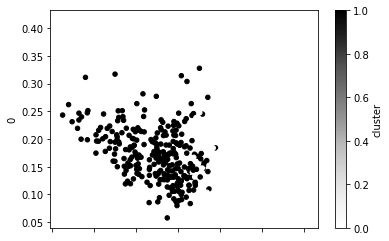

In [47]:
new_df.plot.scatter(x=1, y=0, c='cluster')

<AxesSubplot:xlabel='1', ylabel='0'>

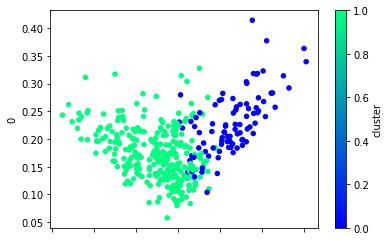

In [48]:
new_df.plot.scatter(x=1, y=0, c='cluster', cmap='winter')

#### ColorMaps in MatplotLib

https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:xlabel='1', ylabel='0'>

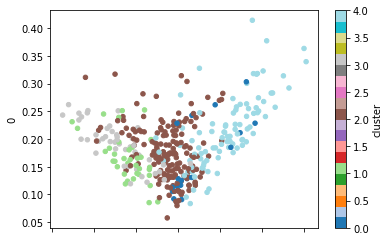

In [43]:
new_df.plot.scatter(x=1, y=0, c='cluster', cmap='tab20')

In [ ]:
new_df.plot.scatter(x=1, y=0, c='cluster', cmap='winter')

In [49]:
svd.singular_values_

array([3.71930583, 2.03572502])

In [51]:
svd.components_.shape

(2, 35048)

In [77]:
for k, row in enumerate(svd.components_):
    print(f"Components {k}\t", df.columns[[row.argsort()[:15]]])

Components 0	 Index(['electrician', 'despot', 'unsafe', 'overstuffed', 'hairdos',
       'degradation', 'slur', 'nan', 'detonate', 'yaobang', 'reunification',
       'biao', 'dialed', 'unreformed', 'penitence'],
      dtype='object')
Components 1	 Index(['miss', 'film', 'theater', 'broadway', 'music', 'jazz', 'films', 'band',
       'stage', 'movies', 'actress', 'hollywood', 'actor', 'movie',
       'barrymore'],
      dtype='object')


/opt/conda/lib/python3.8/site-packages/pandas/core/indexes/base.py:4307: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [53]:
kmeans_model.labels_

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,

In [55]:
X_distances_cluster = kmeans_model.transform(X)
X_distances_cluster

array([[0.97356483, 0.98978981],
       [1.0197693 , 0.98852452],
       [0.98862405, 0.99138939],
       [1.00935257, 0.98648213],
       [0.99902432, 0.97770129],
       [0.96856278, 0.98888364],
       [1.01297585, 0.98183949],
       [1.01683045, 0.98320795],
       [1.01111206, 0.98919298],
       [1.01310281, 0.98983578],
       [1.01567711, 0.99726465],
       [0.99484914, 0.97210253],
       [1.02859771, 1.00169262],
       [1.01799105, 0.99453817],
       [1.0128839 , 0.98614972],
       [1.01056888, 0.98773669],
       [1.01065883, 0.99306958],
       [1.01399278, 0.9889413 ],
       [1.01171537, 0.98688432],
       [0.98575865, 0.99953814],
       [1.00714239, 0.99543751],
       [1.00397094, 0.97946366],
       [1.00825108, 0.97296957],
       [0.99850072, 0.98757731],
       [0.99792707, 0.97424059],
       [1.00319887, 0.98585497],
       [1.00985043, 0.99080556],
       [0.97362632, 0.98498635],
       [0.93989865, 0.98225097],
       [1.00289039, 0.99041458],
       [1.

In [59]:
tmp_df = pd.DataFrame(X_distances_cluster)
tmp_df

,0,1
0,0.973565,0.989790
1,1.019769,0.988525
2,0.988624,0.991389
3,1.009353,0.986482
4,0.999024,0.977701
...,...,...
359,0.998753,0.985662
360,1.014838,0.983274
361,0.915109,0.956749
362,0.996142,0.981559


In [60]:
tmp_df.index = df.index
tmp_df.head(5)

,0,1
subject,,
Randolph,0.973565,0.989790
Basie,1.019769,0.988525
Swope,0.988624,0.991389
Ulanova,1.009353,0.986482
Sousa,0.999024,0.977701


In [76]:
tmp_df.sort_values(1).index

Index(['O'Keeffe', 'O'Neill', 'Grant', 'Elizabeth', 'Wharton', 'Kennedy_1',
       'Tandy', 'Pulitzer', 'White', 'Astaire',
       ...
       'Nietzsche', 'Deng', 'Kellogg', 'Busch', 'Marcos', 'Gutenberg',
       'Pepper', 'Holland', 'Ruth', 'Vargas'],
      dtype='object', name='subject', length=364)

## More dimensionality reduction techniques in sklearn

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

The textbook *(text analysis in python for social scientists)* discusses more dimensionality reduction methods (e.g NMF Nonnegative Matrix Factorization, T-SNE) 

(back to slides)

### TSNE

In [ ]:
from sklearn.manifold import TSNE
tsne_transformed = TSNE(n_components=2).fit_transform(X)
tsne_transformed.shape

In [ ]:
tsne_df = pd.DataFrame(tsne_transformed)
tsne_df['cluster'] = kmeans_model.labels_

In [ ]:
tsne_df.plot.scatter(x=1, y=0, c='cluster', cmap='winter')